**Step 0: **

Initialize the weight vector and bias with zeros (or small random values)

OR

Compute the parameters directly using the normal equation

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
where is a matrix of shape
that holds all training examples, and

denotes the dot product.

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

**Step 3: ** (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:


The gradient containing all partial derivatives can then be computed as follows:

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector and bias:

where is the learning rate.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)


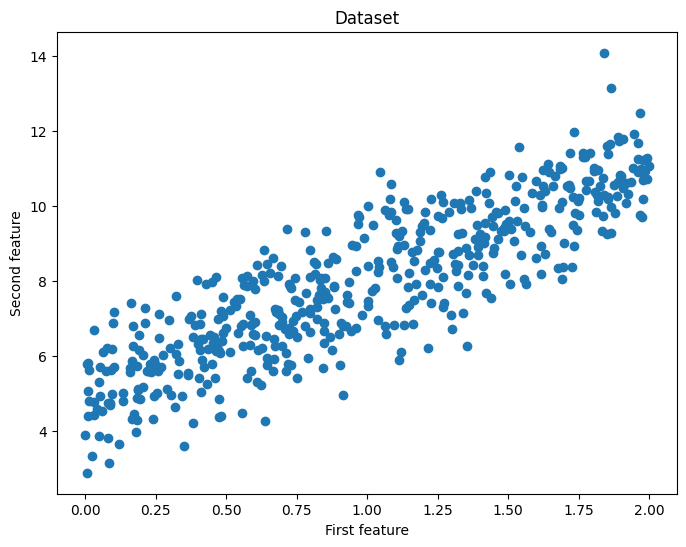

In [2]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



In [3]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [28]:
class LinearRegression:
    def __init__(self):
        pass
    def train_gradient_descent(self, X, y, learning_rate = 0.01, n_iters = 100):
        '''
        Trains a linear regression model using gradient descent
        ''' 

        #Step 0: Initialize the parameters 
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape = (n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            #Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            #Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y) **2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            #Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y))

            #Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        ''' 
        Trains a linear regression model using the normal equation
        '''
        self.weights = np.dot (np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y)
        self.bias = 0
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.208434614609594
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467


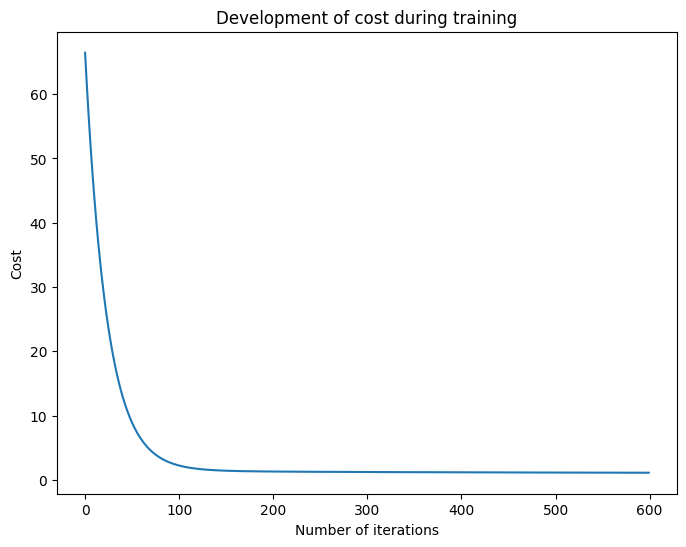

In [29]:
regressor = LinearRegression()

w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate = .005, n_iters = 600)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [30]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape


y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train = (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test = (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.0955
Error on test set: 1.0


In [31]:
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

In [32]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train = (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test = (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 1.0228
Error on test set: 1.0432


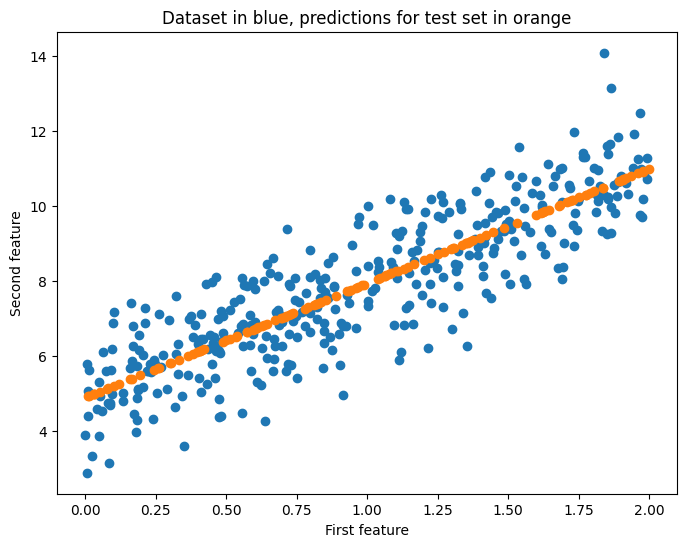

In [34]:
#Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()